<a href="https://colab.research.google.com/github/Vinodkumarvadranapu/Activity/blob/main/Time_Serie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement


A multinational e-commerce company idenified a segment of products which are showing less sales when comapred to other class of products. As the prices of those products are volatile periodically based on demand and other economic factors, if they quote right price on time then th



There is a multinational e-commerce company that sells different types of products. They noticed that some products in a particular category are not selling as well as others. The prices of these products tend to change frequently because they are influenced by factors like customer demand and economic conditions.

The company believes that if they can determine the right price to set for these products at a specific time, they can increase sales and improve their performance. They have historical data for one of these products, including past prices over time.

To help them make informed pricing decisions, they want to perform a time series analysis. This involves studying the historical price data, identifying patterns and trends, and forecasting the future prices for the product. By understanding the expected price changes, they can determine the optimal price to quote for the product during a given period.

In [21]:
# Load the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 


In [22]:
data = pd.read_csv("/content/TimeSeries.csv") # Reading the data 

In [23]:
data.shape  # check how many rows and columns

(19657, 3)

In [24]:
data.head() # check the top 5 records

,SKU,Price,Date
0,1,129.98,01-06-2009
1,2,57.96,01-06-2009
2,3,84.38,08-12-2009
3,1,159.96,08-12-2009
4,2,56.98,08-12-2009


In [25]:
data.info() # check the data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19657 entries, 0 to 19656
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SKU     19657 non-null  int64  
 1   Price   19657 non-null  float64
 2   Date    19657 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 460.8+ KB


In [32]:
data.SKU.value_counts() # check the frequency

1    6997
2    6812
3    5848
Name: SKU, dtype: int64

In [33]:
data.dtypes # check the data types

SKU            category
Price           float64
Date             object
date     datetime64[ns]
dtype: object

### Basic Data preprocessing

In [34]:
data['SKU'] = data['SKU'].astype('category') # Convert 'SKU' variable to category
data['date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y') # Convert date variable into Date format 

In [35]:
data.head()

,SKU,Price,Date,date
0,1,129.98,01-06-2009,2009-06-01
1,2,57.96,01-06-2009,2009-06-01
2,3,84.38,08-12-2009,2009-12-08
3,1,159.96,08-12-2009,2009-12-08
4,2,56.98,08-12-2009,2009-12-08


In [36]:
data.describe(include='all') # check the summary of the data 

<ipython-input-36-5893eebaf9c5>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all') # check the summary of the data


,SKU,Price,Date,date
count,19657.0,19657.000000,19657,19657
unique,3.0,NaN,1657,1657
top,1.0,NaN,17-09-2011,2011-09-17 00:00:00
freq,6997.0,NaN,23,23
first,NaN,NaN,NaN,2009-03-06 00:00:00
last,NaN,NaN,NaN,2013-12-02 00:00:00
mean,NaN,80.625467,NaN,NaN
std,NaN,37.894582,NaN,NaN
min,NaN,20.270000,NaN,NaN
25%,NaN,50.150000,NaN,NaN


In [37]:
data[data.Price==999] # checking how many rows are with price:999

,SKU,Price,Date,date
3441,3,999.0,24-08-2010,2010-08-24


In [38]:
# removing the records with price more  than 999
data = data[data.Price!=999]

In [39]:
# Let us focus on speciffic product. So, filter the data only for one particular SKU
df1 = data[data.SKU==3]
df1.shape
df1.describe()


,Price
count,5847.000000
mean,73.142588
std,17.943083
min,39.840000
25%,60.000000
50%,72.250000
75%,83.750000
max,379.800000


In [40]:
df1.head()

,SKU,Price,Date,date
2,3,84.38,08-12-2009,2009-12-08
11,3,115.98,01-06-2009,2009-06-01
22,3,115.98,02-06-2009,2009-06-02
23,3,84.38,09-12-2009,2009-12-09
35,3,115.98,03-06-2009,2009-06-03


In [41]:
# As all records are from the same SKU, let us delete this variable
df1 = df1.drop(["SKU",'Date'], axis=1)

In [43]:
sorted_data = df1.sort_values('date',ascending=True) # sort the data in the descending order 


In [44]:
sorted_data.head(10) # Check the top 10 records of the data 

,Price,date
1983,58.65,2009-04-15
2005,79.64,2009-04-16
2008,58.65,2009-04-16
2020,79.64,2009-04-17
2030,58.65,2009-04-17
2044,79.64,2009-04-18
2795,115.98,2009-05-30
2822,115.98,2009-05-31
11,115.98,2009-06-01
22,115.98,2009-06-02


In [45]:
unique_data = pd.DataFrame(sorted_data.groupby(['date'],as_index=False)['Price'].min())

In [46]:
unique_data.head()

,date,Price
0,2009-04-15,58.65
1,2009-04-16,58.65
2,2009-04-17,58.65
3,2009-04-18,79.64
4,2009-05-30,115.98


In [47]:
# get the min and max of data 

minDate = min(unique_data.date)
maxDate = max(unique_data.date)
print(minDate)
print(maxDate)

2009-04-15 00:00:00
2013-12-02 00:00:00


In [48]:
# Creating the data sequence
seq = pd.DataFrame(pd.date_range(minDate,maxDate))
# Look at the head
seq.head()

,0
0,2009-04-15
1,2009-04-16
2,2009-04-17
3,2009-04-18
4,2009-04-19


In [49]:
# adding the column name 
seq.columns = ['Date']

In [50]:
unique_data.columns

Index(['date', 'Price'], dtype='object')

In [52]:
# Full outer join on both the dataframes 
data_all = pd.merge(seq,unique_data,how='outer',left_on=['Date'],right_on=['date'],sort=True)

In [53]:
data_all.tail(20) # verifying top 5 records to check if the merging done correctly or not 

,Date,date,Price
1673,2013-11-13,2013-11-13,48.25
1674,2013-11-14,2013-11-14,54.94
1675,2013-11-15,2013-11-15,54.94
1676,2013-11-16,NaT,NaN
1677,2013-11-17,2013-11-17,52.47
1678,2013-11-18,2013-11-18,52.42
1679,2013-11-19,2013-11-19,54.94
1680,2013-11-20,2013-11-20,54.94
1681,2013-11-21,2013-11-21,54.94
1682,2013-11-22,2013-11-22,54.94


In [54]:
data_all = data_all.drop(['date'],axis=1) # dropping the date variable

In [55]:
data_all.head(10)

,Date,Price
0,2009-04-15,58.65
1,2009-04-16,58.65
2,2009-04-17,58.65
3,2009-04-18,79.64
4,2009-04-19,NaN
5,2009-04-20,NaN
6,2009-04-21,NaN
7,2009-04-22,NaN
8,2009-04-23,NaN
9,2009-04-24,NaN


### Handling the missing values

In [56]:
s = pd.Series([1,np.nan,3,4,5,6,7])

In [58]:
s.interpolate(method='linear',limit_direction='forward')

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
dtype: float64

In [59]:
s.interpolate(method='linear',limit_direction='backward')

0    1.0
1    2.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
dtype: float64

In [60]:
s.interpolate(method='pad',limit=2)

0    1.0
1    1.0
2    3.0
3    4.0
4    5.0
5    6.0
6    7.0
dtype: float64

In [61]:
data_all['Price'] = data_all['Price'].interpolate(method='linear',limit_direction='forward')

In [62]:
data_nomiss = data_all.copy()

In [63]:
data_nomiss.head(10)

,Date,Price
0,2009-04-15,58.650000
1,2009-04-16,58.650000
2,2009-04-17,58.650000
3,2009-04-18,79.640000
4,2009-04-19,80.505238
5,2009-04-20,81.370476
6,2009-04-21,82.235714
7,2009-04-22,83.100952
8,2009-04-23,83.966190
9,2009-04-24,84.831429


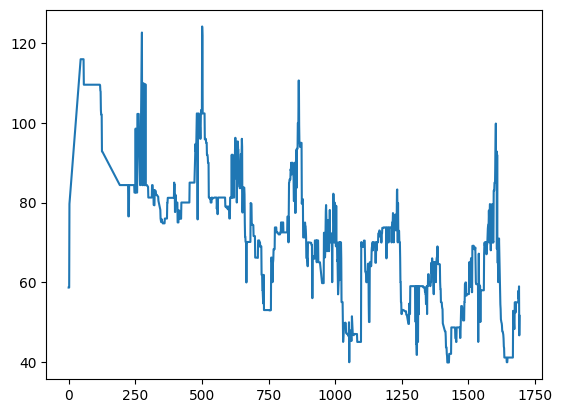

In [64]:
plt.plot(data_nomiss.Price)

In [65]:
data_nomiss['Month'] = data_nomiss['Date'].dt.month 
data_nomiss['Year'] = data_nomiss['Date'].dt.year 

In [67]:
data_nomiss.head()

,Date,Price,Month,Year
0,2009-04-15,58.650000,4,2009
1,2009-04-16,58.650000,4,2009
2,2009-04-17,58.650000,4,2009
3,2009-04-18,79.640000,4,2009
4,2009-04-19,80.505238,4,2009


In [68]:
agg_data = pd.DataFrame(data_nomiss.groupby(['Year','Month'],as_index=False)['Price'].mean())

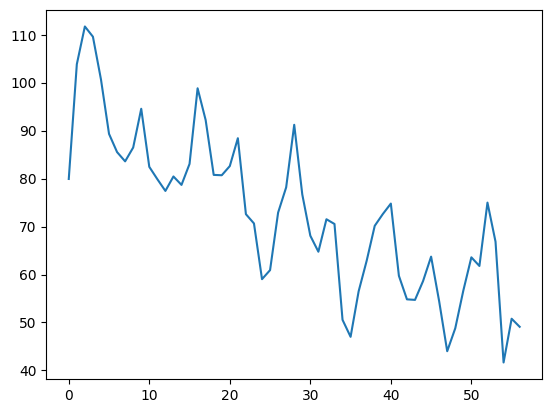

In [69]:
plt.plot(agg_data['Price'])

In [70]:
agg_data[:10]

,Year,Month,Price
0,2009,4,79.922411
1,2009,5,103.838756
2,2009,6,111.713333
3,2009,7,109.580000
4,2009,8,100.662903
5,2009,9,89.320833
6,2009,10,85.522581
7,2009,11,83.595000
8,2009,12,86.476774
9,2010,1,94.561613


In [71]:
agg_data['Date'] = pd.to_datetime(agg_data[['Year','Month']].assign(Day=1)) # adding the date variable 

In [72]:
agg_data.head()

,Year,Month,Price,Date
0,2009,4,79.922411,2009-04-01
1,2009,5,103.838756,2009-05-01
2,2009,6,111.713333,2009-06-01
3,2009,7,109.580000,2009-07-01
4,2009,8,100.662903,2009-08-01


In [73]:
agg_data.shape

(57, 4)

In [74]:
np.arange(1,len(agg_data))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56])

In [75]:
agg_data['Time_seq'] = np.arange(1,len(agg_data)+1)

In [76]:
agg_data = agg_data.drop(['Year'],axis=1)


In [77]:
agg_data.tail()

,Month,Price,Date,Time_seq
52,8,74.991129,2013-08-01,53
53,9,66.848000,2013-09-01,54
54,10,41.663871,2013-10-01,55
55,11,50.784500,2013-11-01,56
56,12,49.100000,2013-12-01,57


In [78]:
agg_data.set_index('Date',inplace=True)

In [79]:
train = agg_data.loc[agg_data.Time_seq <49,]
test = agg_data.loc[agg_data.Time_seq >=49,]

print(train.shape)
print(test.shape)

In [80]:
print(train.index.min())
print(train.index.max())
print(test.index.min())
print(test.index.max())

2009-04-01 00:00:00
2013-03-01 00:00:00
2013-04-01 00:00:00
2013-12-01 00:00:00


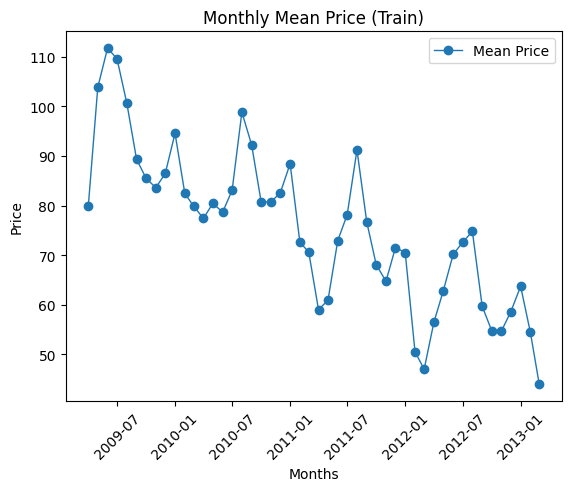

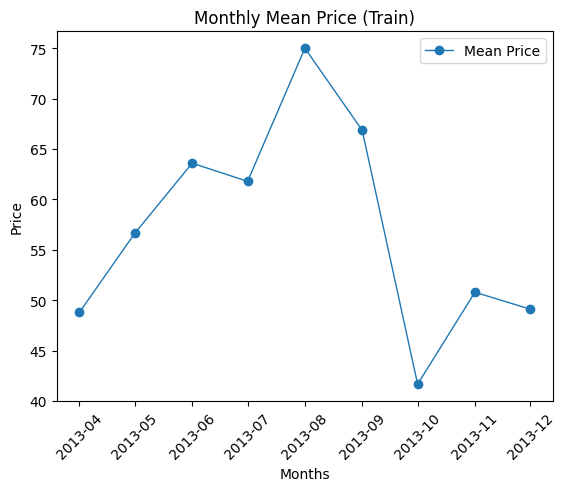

In [81]:
# Visualize train data
fig, ax = plt.subplots()
lines = plt.plot(train.index, train.Price, '-o')
plt.setp(lines, linewidth=1.0)
plt.xticks(rotation = 45)
plt.title('Monthly Mean Price (Train)')
plt.xlabel('Months')
plt.ylabel('Price')
plt.legend(['Mean Price'],loc = 'best')
plt.show()
fig, ax = plt.subplots()
lines = plt.plot(test.index, test.Price, '-o')
plt.setp(lines, linewidth=1.0)
plt.xticks(rotation = 45)
plt.title('Monthly Mean Price (Train)')
plt.xlabel('Months')
plt.ylabel('Price')
plt.legend(['Mean Price'],loc = 'best')
plt.show()

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

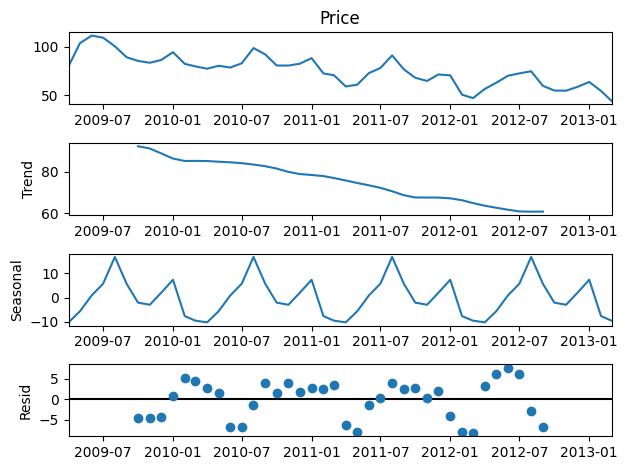

In [85]:
decomposition = seasonal_decompose(train.Price)
decomposition.plot()
plt.show()

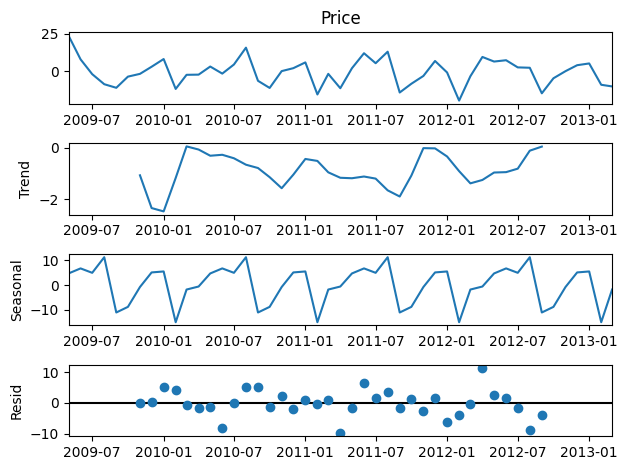

In [87]:
decomposition = seasonal_decompose(train.Price.diff(1)[1:])
decomposition.plot()
plt.show()

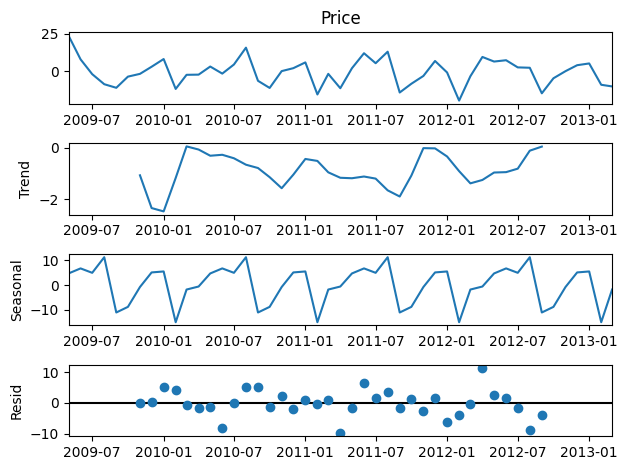

In [88]:
decomposition.plot()
plt.show()

### Time Series Modelling 

In [89]:
import statsmodels.api as sm # loadig the modules to build the regression model

In [90]:
lm = sm.OLS(train.Price,train.Time_seq)

In [91]:
lm = lm.fit()
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.593
Model:                            OLS   Adj. R-squared (uncentered):              0.584
Method:                 Least Squares   F-statistic:                              68.38
Date:                Thu, 01 Jun 2023   Prob (F-statistic):                    1.01e-10
Time:                        08:41:05   Log-Likelihood:                         -255.25
No. Observations:                  48   AIC:                                      512.5
Df Residuals:                      47   BIC:                                      514.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [92]:
lm.fittedvalues[:10]

Date
2009-04-01     2.114488
2009-05-01     4.228976
2009-06-01     6.343463
2009-07-01     8.457951
2009-08-01    10.572439
2009-09-01    12.686927
2009-10-01    14.801414
2009-11-01    16.915902
2009-12-01    19.030390
2010-01-01    21.144878
dtype: float64

In [93]:
pred_test = lm.predict(test.Time_seq)

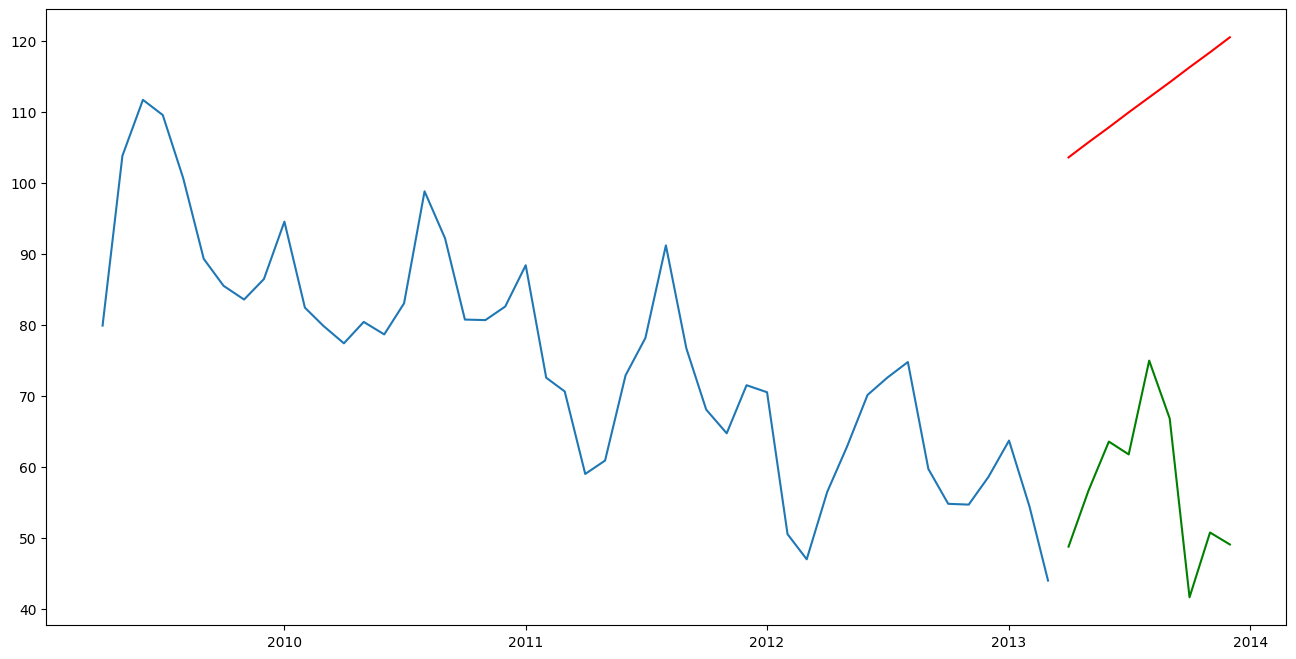

In [94]:
#Plot the predicted data
model_forecast = test.copy()
model_forecast['linear_reg_forecast'] = pred_test
plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test',color='green')
plt.plot(model_forecast['linear_reg_forecast'], label='linear_reg_forecast',color = 'red')
plt.show()

In [95]:
model_forecast

,Month,Price,Time_seq,linear_reg_forecast
Date,,,,
2013-04-01,4,48.792000,49,103.609901
2013-05-01,5,56.641290,50,105.724389
2013-06-01,6,63.586333,51,107.838877
2013-07-01,7,61.783548,52,109.953365
2013-08-01,8,74.991129,53,112.067853
2013-09-01,9,66.848000,54,114.182340
2013-10-01,10,41.663871,55,116.296828
2013-11-01,11,50.784500,56,118.411316
2013-12-01,12,49.100000,57,120.525804


In [96]:
from sklearn import metrics

## Evaluating the model

In [97]:
def error_metrics(train_act,train_pred,test_act,test_pred):
        print('*** Error metrics Train data ***')
        print('MAE Train:', metrics.mean_absolute_error(train_act, train_pred))
        print('MSE Train:', metrics.mean_squared_error(train_act, train_pred))
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(train_act, train_pred)))
        print('MAPE Train:', metrics.mean_absolute_percentage_error(train_act, train_pred))

        print('***\n Error metrics Test Data ***')

        print('MAE Train:', metrics.mean_absolute_error(test_act,test_pred))
        print('MSE Train:', metrics.mean_squared_error(test_act,test_pred))
        print('RMSE Train:', np.sqrt(metrics.mean_squared_error(test_act,test_pred)))
        print('MAPE Train:', metrics.mean_absolute_percentage_error(test_act,test_pred))
        



In [98]:
error_metrics(train.Price,lm.fittedvalues,test.Price,pred_test)

*** Error metrics Train data ***
MAE Train: 40.87788081063271
MSE Train: 2434.252354780861
RMSE Train: 49.33814300093652
MAPE Train: 0.5210367807192381
***
 Error metrics Test Data ***
MAE Train: 54.935555724372364
MSE Train: 3172.567218181148
RMSE Train: 56.32554676326851
MAPE Train: 1.0273132777738863


### Adding the Month variable - to add seasonality Component

In [99]:
train['Month'] = train.Month.astype('category')
test['Month'] = test.Month.astype('category')


<ipython-input-99-760c7ebada1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Month'] = train.Month.astype('category')
<ipython-input-99-760c7ebada1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Month'] = test.Month.astype('category')


In [100]:
train.dtypes

Month       category
Price        float64
Time_seq       int64
dtype: object

In [101]:
train_dummy = pd.get_dummies(train,drop_first=True,dtype='int8')
test_dummy = pd.get_dummies(test,dtype='int8')

In [102]:
print(train_dummy.columns)
print("\n")
print(test_dummy.columns)

print("\n No. of columns in Train Data :{}".format(len(train_dummy.columns)))
print("\n")
print(test_dummy.columns)
print("\n No. of columns in Test Data :{}".format(len(test_dummy.columns)))



Index(['Price', 'Time_seq', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12'],
      dtype='object')


Index(['Price', 'Time_seq', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

 No. of columns in Train Data :13


Index(['Price', 'Time_seq', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12'],
      dtype='object')

 No. of columns in Test Data :11


### Alligning the Levels b/w Train and Test Data sets 

In [103]:
train_allign,test_allign = train_dummy.align(test_dummy, join='outer', axis=1,fill_value=0)

In [104]:
train_dummy.head()

,Price,Time_seq,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
Date,,,,,,,,,,,,,
2009-04-01,79.922411,1,0,0,1,0,0,0,0,0,0,0,0
2009-05-01,103.838756,2,0,0,0,1,0,0,0,0,0,0,0
2009-06-01,111.713333,3,0,0,0,0,1,0,0,0,0,0,0
2009-07-01,109.580000,4,0,0,0,0,0,1,0,0,0,0,0
2009-08-01,100.662903,5,0,0,0,0,0,0,1,0,0,0,0


In [105]:
train_allign = sm.add_constant(train_allign)
test_allign = sm.add_constant(test_allign)


In [106]:
print(train_allign.columns)
print("\n")
print(test_allign.columns)

print("\n No. of columns in Train Data :{}".format(len(train_allign.columns)))
print("\n")
print(test_allign.columns)
print("\n No. of columns in Test Data :{}".format(len(test_allign.columns)))



Index(['const', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Price', 'Time_seq'],
      dtype='object')


Index(['const', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Price', 'Time_seq'],
      dtype='object')

 No. of columns in Train Data :14


Index(['const', 'Month_10', 'Month_11', 'Month_12', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Price', 'Time_seq'],
      dtype='object')

 No. of columns in Test Data :14


In [107]:
lm_season = sm.OLS(train_allign.Price,train_allign.drop(['Price'],axis=1))

In [108]:
lm_season = lm_season.fit()
print(lm_season.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     25.11
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           1.13e-13
Time:                        08:42:25   Log-Likelihood:                -146.27
No. Observations:                  48   AIC:                             318.5
Df Residuals:                      35   BIC:                             342.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        104.9117      3.483     30.122      0.0

In [109]:
predtest_lmTime = lm_season.predict(test_allign.drop(['Price'],axis=1))

In [110]:
error_metrics(train.Price,lm_season.fittedvalues,test.Price,predtest_lmTime)

*** Error metrics Train data ***
MAE Train: 4.1195097099513225
MSE Train: 25.958874845233282
RMSE Train: 5.09498526447656
MAPE Train: 0.054855786508111216
***
 Error metrics Test Data ***
MAE Train: 7.119109464553627
MSE Train: 65.55446560651752
RMSE Train: 8.096571225309978
MAPE Train: 0.1207244157509048


### Modelling the time series using simple moving averages(SMA)

In [111]:
window=3
train['SMA_3'] = train['Price'].rolling(window).mean()


<ipython-input-111-1ebced3c197a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['SMA_3'] = train['Price'].rolling(window).mean()


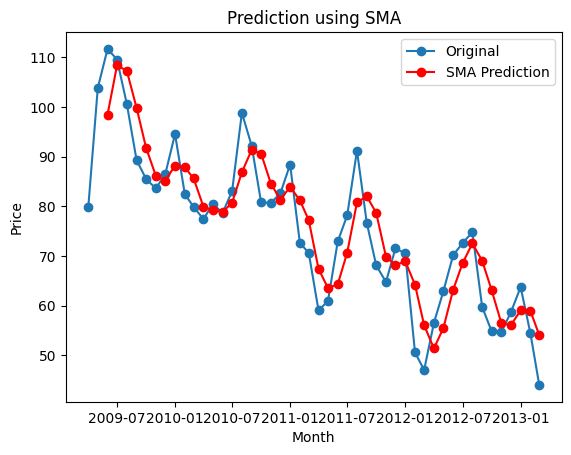

In [112]:
plt.plot(train.index,train.Price,'-o',label = 'Original')
plt.plot(train['SMA_3'],'-o', color='red', label = 'SMA Prediction')

plt.xlabel('Month')
plt.ylabel('Price')
plt.title('Prediction using SMA')
plt.legend()
plt.show()

### Forecasting on testdata


In [113]:
history = list(train['SMA_3'].values)
sma_predict = list()

for t in range(len(test)):
    length = len(history)
    yhat =np.mean(history[length-window:length])
    sma_predict.append(yhat)
    history.append(yhat)
    

In [114]:
sma_predict

[57.33686294589521,
 56.77433577971214,
 56.05593976977491,
 56.722379498460754,
 56.51755168264927,
 56.43195698362831,
 56.557296054912776,
 56.50226824039678,
 56.49717375964595]

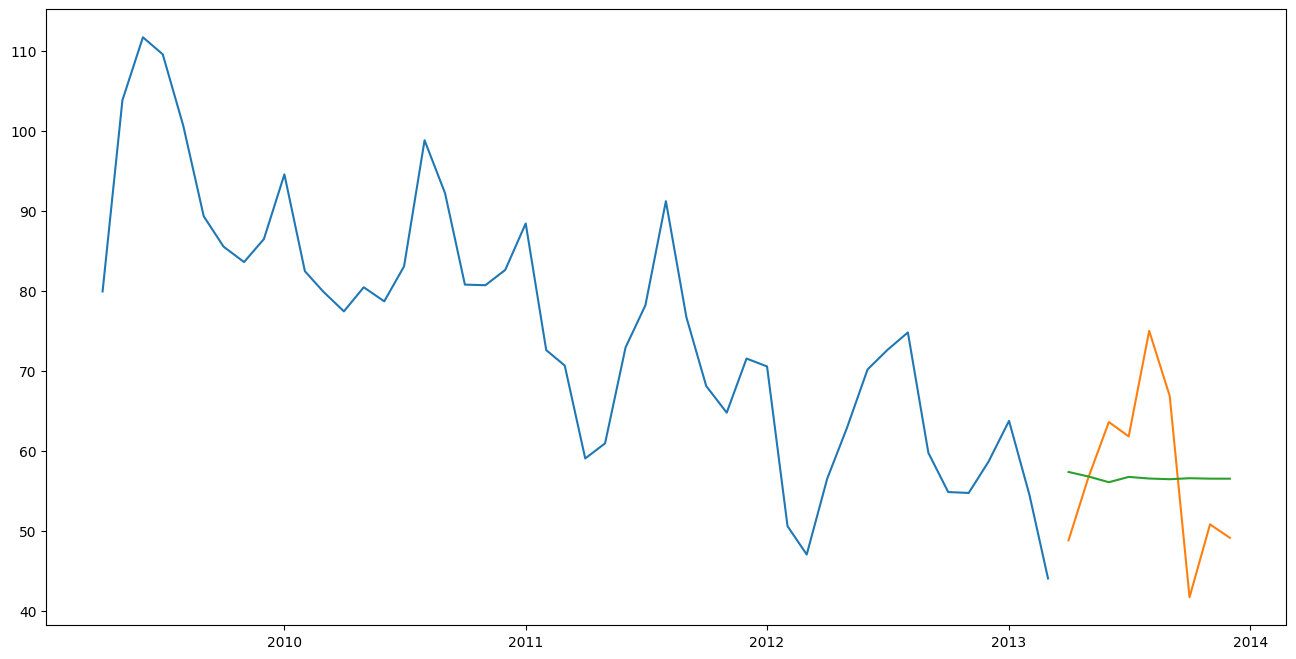

In [115]:
model_forecast=test.copy()
model_forecast['moving_avg_forecast'] = sma_predict
plt.figure(figsize=(16,8))
plt.plot(train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['moving_avg_forecast'], label='Moving Average Forecast')
plt.show()

In [116]:
pd.DataFrame(error_metrics(train['Price'][2:], train.SMA_3[2:],test['Price'], sma_predict))

*** Error metrics Train data ***
MAE Train: 5.785880163652813
MSE Train: 45.986038457535194
RMSE Train: 6.78130064644941
MAPE Train: 0.08267890672316619
***
 Error metrics Test Data ***
MAE Train: 8.685273145379467
MSE Train: 101.59409087983494
RMSE Train: 10.079389410070183
MAPE Train: 0.15563261200028744


""


### Modelling the time series using Exponential moving averages (EMA)


In [117]:
train['EMA_3'] = train.Price.ewm(span=window).mean()


<ipython-input-117-966f625048f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['EMA_3'] = train.Price.ewm(span=window).mean()


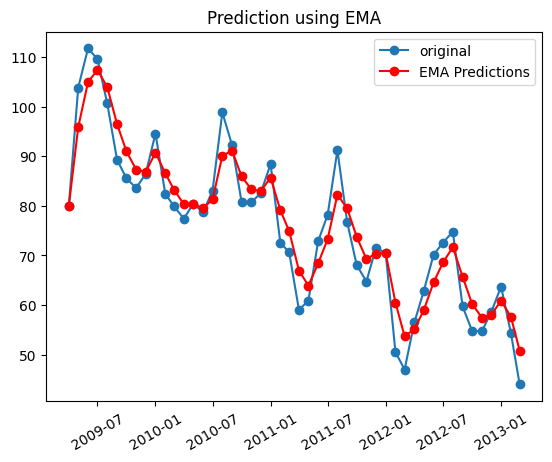

In [118]:
plt.plot(train.index,train.Price,'-o',label = 'original')
plt.plot(train.index,train['EMA_3'],'-o', color='red',label = 'EMA Predictions')

plt.title("Prediction using EMA")
plt.legend()
plt.xticks(rotation=30)
plt.show()

### Forecasting on testdata

In [119]:
history = list(train['EMA_3'].values)
ema_predict = list()

for t in range(len(test)):
    length = len(history)
    print(range(length-window,length))
    yhat=np.mean(history[length-window:length])
    ema_predict.append(yhat)
    history.append(yhat)


range(45, 48)
range(46, 49)
range(47, 50)
range(48, 51)
range(49, 52)
range(50, 53)
range(51, 54)
range(52, 55)
range(53, 56)


In [120]:
error_metrics(train['Price'][2:], train.EMA_3[2:],test['Price'], ema_predict)

*** Error metrics Train data ***
MAE Train: 3.981017221745753
MSE Train: 21.89093857329062
RMSE Train: 4.678775328362179
MAPE Train: 0.05706760698608183
***
 Error metrics Test Data ***
MAE Train: 8.965317633758003
MSE Train: 108.37010442603233
RMSE Train: 10.410096273619775
MAPE Train: 0.15615941927506763


In [121]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt


## Holt Winter’s Exponential Smoothing
Holt-Winters exponential smoothing with trend and additive seasonal component.



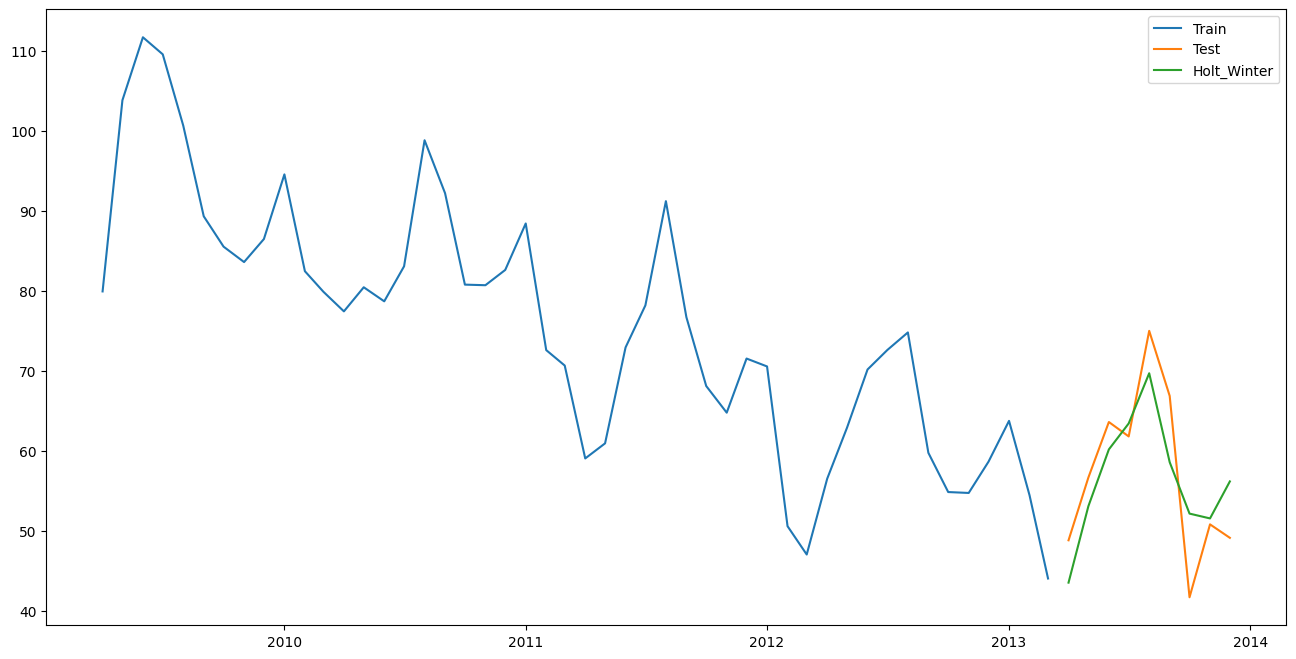

In [122]:

holt_exp_add = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12, seasonal='additive',).fit()
model_forecast['Holt_Winter'] = holt_exp_add.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [123]:
error_metrics(train['Price'][2:], holt_exp_add.forecast(len(train[2:])),test['Price'], 
              holt_exp_add.forecast(len(test)))


*** Error metrics Train data ***
MAE Train: 22.19188704786732
MSE Train: 686.423577749264
RMSE Train: 26.199686596393935
MAPE Train: 0.2786973026232078
***
 Error metrics Test Data ***
MAE Train: 5.088249135280032
MSE Train: 34.671118843108694
RMSE Train: 5.888218647698869
MAPE Train: 0.0951514612552583


## Holt-Winters exponential smoothing additive trend with multiplicative seasonal component.

In [124]:
holt_exp_mul = ExponentialSmoothing(np.asarray(train['Price']) ,seasonal_periods=12 , seasonal='multiplicative',trend='add').fit()


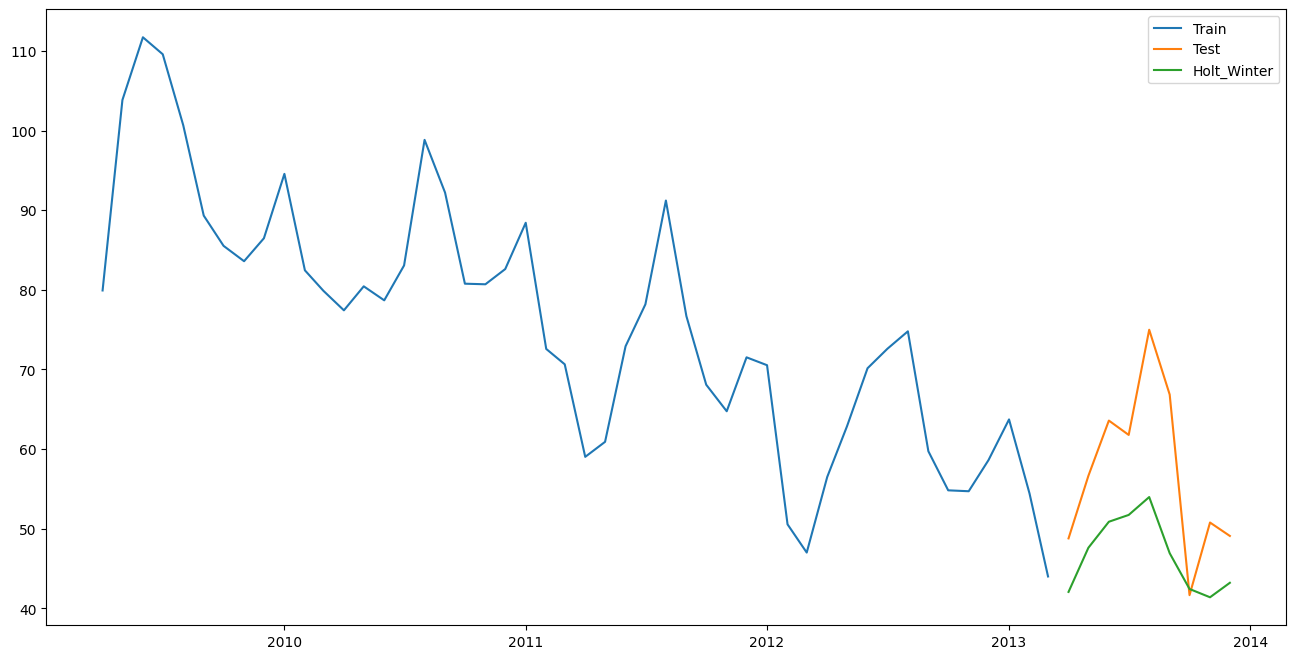

In [125]:
model_forecast['Holt_Winter'] = holt_exp_mul.forecast(len(test))
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [126]:
error_metrics(train['Price'][2:], holt_exp_mul.forecast(len(train[2:])),test['Price'], 
              holt_exp_mul.forecast(len(test)))



*** Error metrics Train data ***
MAE Train: 45.17823112594237
MSE Train: 2131.3792258369563
RMSE Train: 46.16686285461636
MAPE Train: 0.6129223465251519
***
 Error metrics Test Data ***
MAE Train: 10.607703017606209
MSE Train: 150.03553619893543
RMSE Train: 12.24889938724845
MAPE Train: 0.17343145920872902


In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


## ACF and PACF

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


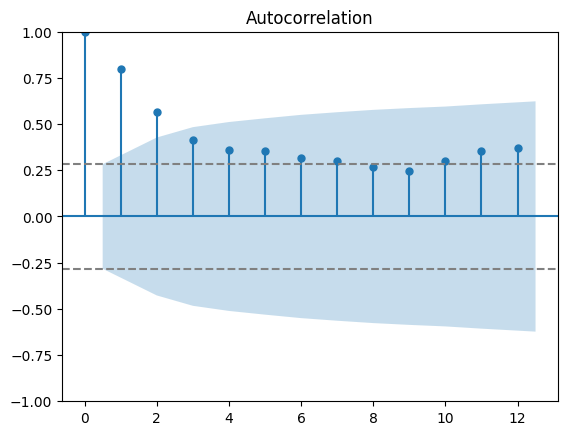

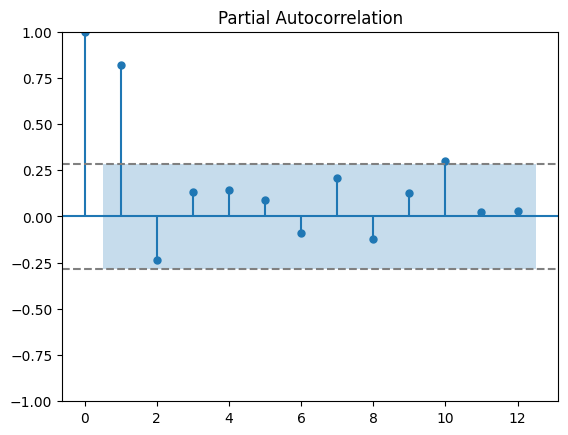

In [128]:
### ACF and PACF

#### ACF: n th lag of ACF is the correlation between a day and n days before that. 
#PACF: The same as ACF with all intermediate correlations removed.

#ACF
plot_acf(train.Price, zero=True, lags=int(24*0.5))
plt.axhline(y=-1.96/np.sqrt(len(train)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)), linestyle='--',color='gray')

#PACF
plot_pacf(train.Price,zero=True,lags=int(24*0.5))
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.show()



## Making the data stationary

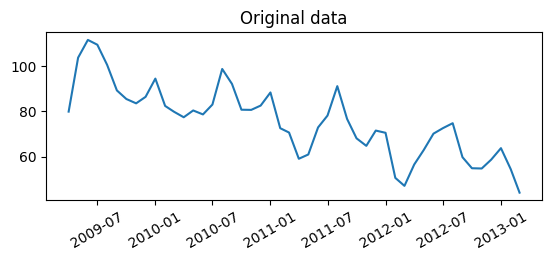

In [129]:
#### Looking at the Y scale in ACF we observe that both trend and seasonality is present.

#### Stationarize by differencing

# Before differencing
plt.subplot(212)
plt.plot(train.Price)
plt.xticks(rotation=30)
plt.title("Original data")
plt.show()




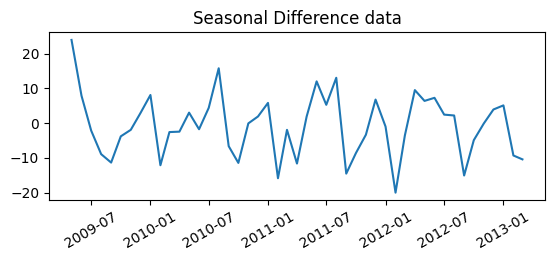

In [130]:
# After differencing
plt.subplot(212)
plt.plot(train.Price.diff(1))
plt.xticks(rotation=30)
plt.title("Seasonal Difference data")
plt.show()



/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


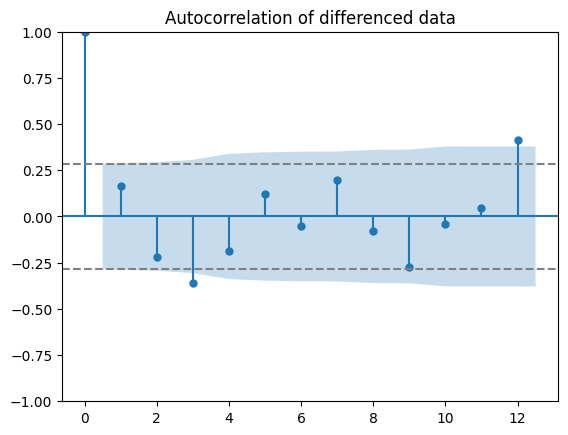

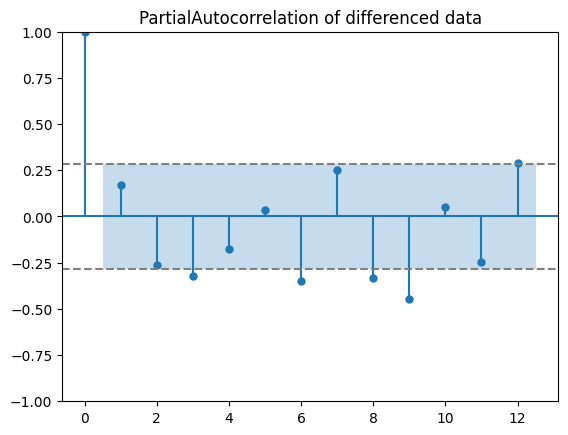

In [131]:
#### ACF plot and PACF plt after differencing

plot_acf(train.Price.diff(1).dropna(),zero=True,lags=12,title='Autocorrelation of differenced data')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')

plot_pacf(train.Price.diff(1).dropna(),zero=True,lags=12,title='PartialAutocorrelation of differenced data')
plt.axhline(y=-1.96/np.sqrt(len(train)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(train)),linestyle='--',color='gray')

plt.show()



<ipython-input-132-174db98f588f>:3: FutureWarning: dtype lost in 'diff()'. In the future this will raise a TypeError. Convert to a suitable dtype prior to calling 'diff'.
  plt.plot(train.index, train.diff(1).Price.values,'-o')


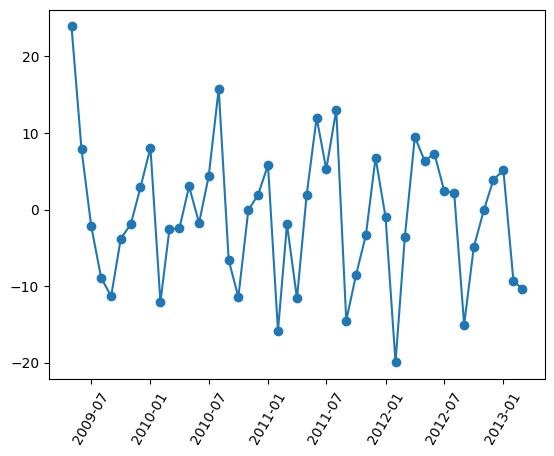

In [132]:
#### Visualizing the differenced data

plt.plot(train.index, train.diff(1).Price.values,'-o')
plt.xticks(rotation = 60)
plt.show()

## Statistical Tests

In [133]:
from statsmodels.tsa.stattools import adfuller

In [134]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [135]:
adfuller_test(train['Price'])

ADF Test Statistic : -0.5563647080341141
p-value : 0.8805401783657377
#Lags Used : 9
Number of Observations Used : 38
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [136]:
adfuller_test(train['Price'].diff(1)[1:])

ADF Test Statistic : -4.675071090602692
p-value : 9.371071798731891e-05
#Lags Used : 10
Number of Observations Used : 36
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


## ARIMA Model

In [137]:
from statsmodels.tsa.arima.model import ARIMA

In [138]:

# AR(p=2 ) = y t  =  alpha + Beta1 * y(t-1) + Beta2 * y(t-2)+ error(t-1) + Beta2 * error(t-2) 

In [139]:
model_arima = ARIMA(train['Price'].values, order=(2,1,1))
model_arima_fit = model_arima.fit()
print(model_arima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                -164.031
Date:                Thu, 01 Jun 2023   AIC                            336.062
Time:                        08:45:01   BIC                            343.463
Sample:                             0   HQIC                           338.847
                                 - 48                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8634      0.193      4.465      0.000       0.484       1.242
ar.L2         -0.4674      0.198     -2.364      0.018      -0.855      -0.080
ma.L1         -0.7555      0.222     -3.410      0.0

In [140]:
model_arima_forecast = model_arima_fit.forecast(steps = len(test))
print(model_arima_forecast)

[45.53391962 51.71839814 56.34615498 57.45087885 56.2415068  54.68095385
 53.89888707 53.9531153  54.36550241]


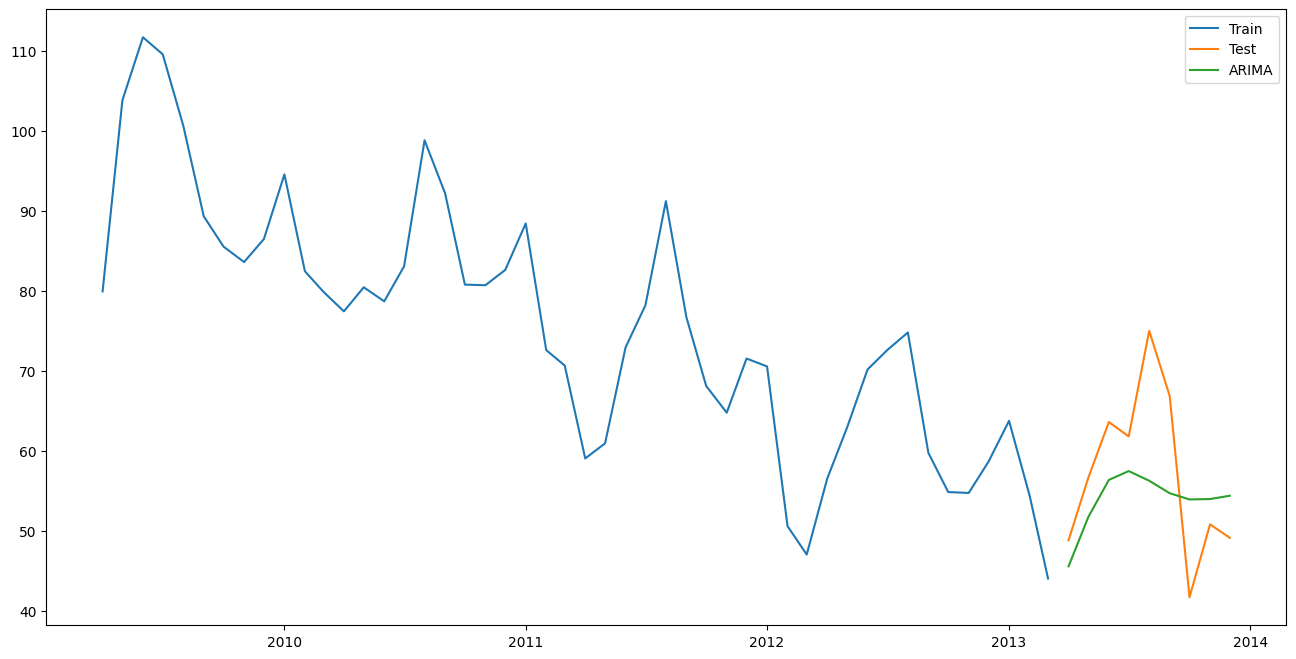

In [141]:
model_forecast['ARIMA'] = model_arima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.show()

In [142]:
error_metrics(train['Price'], model_arima_fit.forecast(steps = len(train)),test['Price'], 
              model_arima_fit.forecast(len(test)))


*** Error metrics Train data ***
MAE Train: 22.154407763166187
MSE Train: 699.0175023608331
RMSE Train: 26.438939130775143
MAPE Train: 0.26668494444769564
***
 Error metrics Test Data ***
MAE Train: 7.926624737012064
MSE Train: 88.12097404123547
RMSE Train: 9.387277243228489
MAPE Train: 0.13700085509988696


## SARIMA Models

In [143]:
model_sarima = ARIMA(train['Price'].values, order=(1,0,1),seasonal_order=(1,0,1,12))
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                   48
Model:             ARIMA(1, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -162.051
Date:                          Thu, 01 Jun 2023   AIC                            336.101
Time:                                  08:45:20   BIC                            347.329
Sample:                                       0   HQIC                           340.344
                                           - 48                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.2852      9.433      7.875      0.000      55.797      92.773
ar.L1          0.6803      0.164      4.144      0.

In [144]:
model_sarima_forecast = model_sarima_fit.forecast(steps = len(test))
print(model_sarima_forecast)

[53.0573969  60.80524901 65.51151641 68.21531699 69.35074505 62.78373076
 61.14591837 62.26858524 63.78202614]


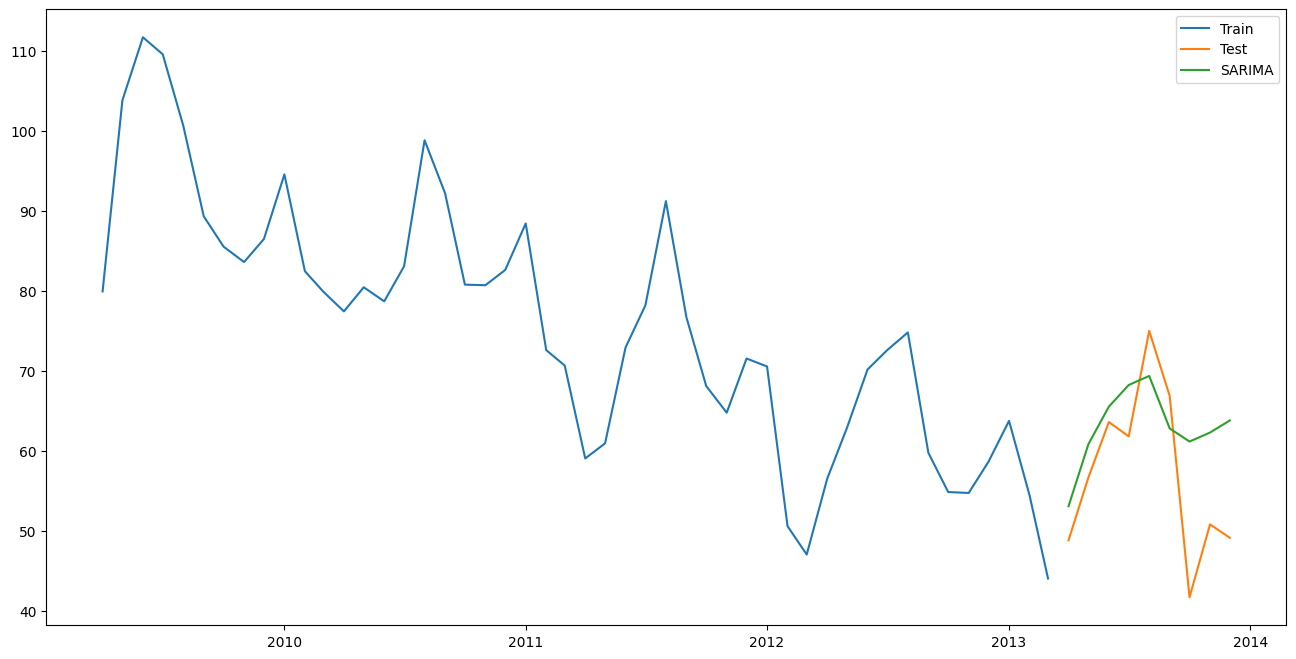

In [145]:
model_forecast['SARIMA'] = model_sarima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                    SARIMAX Results                                     
Dep. Variable:                                y   No. Observations:                   48
Model:             ARIMA(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -117.747
Date:                          Thu, 01 Jun 2023   AIC                            245.493
Time:                                  08:45:34   BIC                            253.270
Sample:                                       0   HQIC                           248.178
                                           - 48                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4954      0.310      1.598      0.110      -0.112       1.103
ma.L1         -0.9996     99.151     -0.010      0.

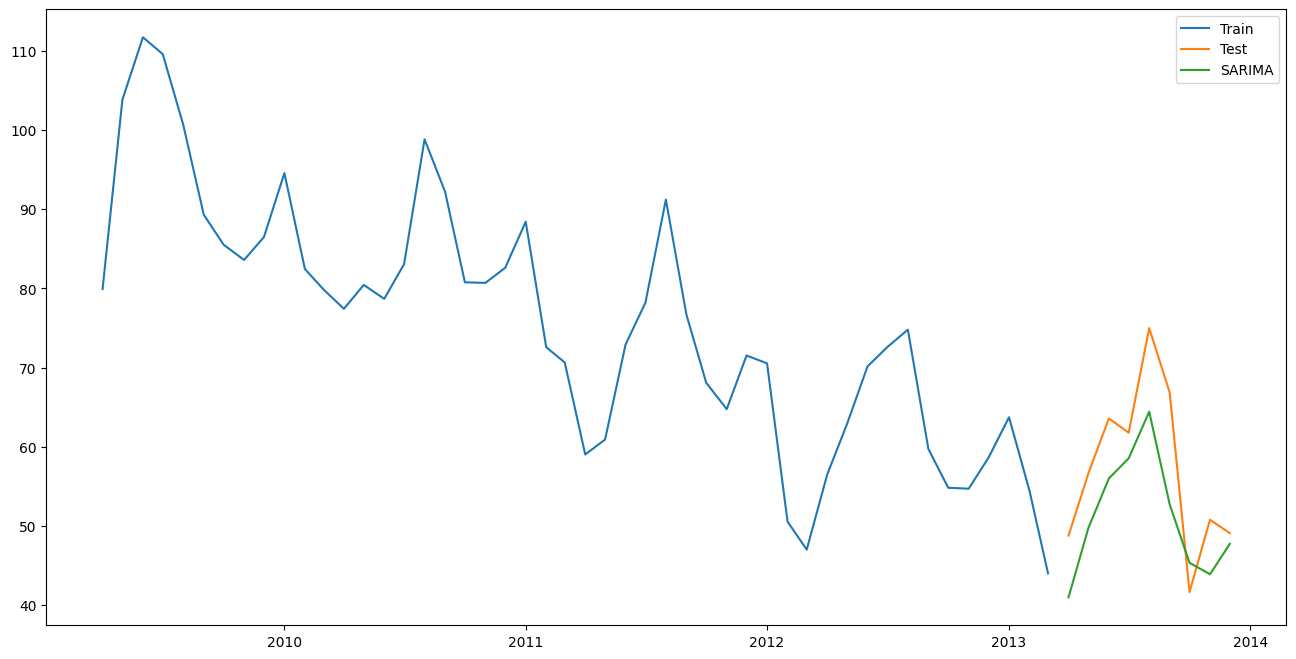

In [146]:
model_sarima = ARIMA(train['Price'].values, order=(1,1,1),seasonal_order=(1,1,1,12))
model_sarima_fit = model_sarima.fit()
print(model_sarima_fit.summary())
model_sarima_forecast = model_sarima_fit.forecast(steps = len(test))
print(model_sarima_forecast)
model_forecast['SARIMA'] = model_sarima_forecast
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [147]:
test.Price

Date
2013-04-01    48.792000
2013-05-01    56.641290
2013-06-01    63.586333
2013-07-01    61.783548
2013-08-01    74.991129
2013-09-01    66.848000
2013-10-01    41.663871
2013-11-01    50.784500
2013-12-01    49.100000
Name: Price, dtype: float64

In [148]:
error_metrics(train['Price'], model_sarima_fit.forecast(steps=len(train)),test['Price'], 
              model_sarima_fit.forecast(steps=len(test)))


*** Error metrics Train data ***
MAE Train: 43.388550864185675
MSE Train: 1908.8011792478417
RMSE Train: 43.68982924260338
MAPE Train: 0.5958200935326893
***
 Error metrics Test Data ***
MAE Train: 6.900827367334996
MSE Train: 61.10018794328323
RMSE Train: 7.8166609203216195
MAPE Train: 0.11740713648334317


In [149]:
error_metrics(train['Price'], model_sarima_fit.forecast(steps=len(train)),test['Price'], 
              model_sarima_fit.forecast(steps=len(test)))


*** Error metrics Train data ***
MAE Train: 43.388550864185675
MSE Train: 1908.8011792478417
RMSE Train: 43.68982924260338
MAPE Train: 0.5958200935326893
***
 Error metrics Test Data ***
MAE Train: 6.900827367334996
MSE Train: 61.10018794328323
RMSE Train: 7.8166609203216195
MAPE Train: 0.11740713648334317


In [150]:
error_metrics(train['Price'], model_sarima_fit.forecast(steps=len(train)),test['Price'], 
              model_sarima_fit.forecast(steps=len(test)))


*** Error metrics Train data ***
MAE Train: 43.388550864185675
MSE Train: 1908.8011792478417
RMSE Train: 43.68982924260338
MAPE Train: 0.5958200935326893
***
 Error metrics Test Data ***
MAE Train: 6.900827367334996
MSE Train: 61.10018794328323
RMSE Train: 7.8166609203216195
MAPE Train: 0.11740713648334317


In [151]:
model_forecast

,Month,Price,Time_seq,moving_avg_forecast,Holt_Winter,ARIMA,SARIMA
Date,,,,,,,
2013-04-01,4,48.792000,49,57.336863,42.071885,45.533920,40.999214
2013-05-01,5,56.641290,50,56.774336,47.612454,51.718398,49.740496
2013-06-01,6,63.586333,51,56.055940,50.882153,56.346155,56.003566
2013-07-01,7,61.783548,52,56.722379,51.738336,57.450879,58.545739
2013-08-01,8,74.991129,53,56.517552,53.982115,56.241507,64.434341
2013-09-01,9,66.848000,54,56.431957,46.931877,54.680954,52.727596
2013-10-01,10,41.663871,55,56.557296,42.440936,53.898887,45.353061
2013-11-01,11,50.784500,56,56.502268,41.398652,53.953115,43.906201
2013-12-01,12,49.100000,57,56.497174,43.217068,54.365502,47.751392


In [154]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 30.8 MB/s eta 0:00:00


### Auto ARIMA Models

In [155]:
from pmdarima.arima import auto_arima

In [156]:
model_autoArima = auto_arima(y=train['Price'])
print(model_autoArima.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   48
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -156.216
Date:                Thu, 01 Jun 2023   AIC                            324.431
Time:                        08:46:27   BIC                            335.532
Sample:                    04-01-2009   HQIC                           328.609
                         - 03-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.3507      0.098     -3.581      0.000      -0.543      -0.159
ar.L1          1.3615      0.163      8.362      0.000       1.042       1.681
ar.L2         -0.7507      0.120     -6.236      0.0

In [157]:
train_pred = model_autoArima.predict(n_periods=len(train))
test_pred = model_autoArima.predict(n_periods=len(test))

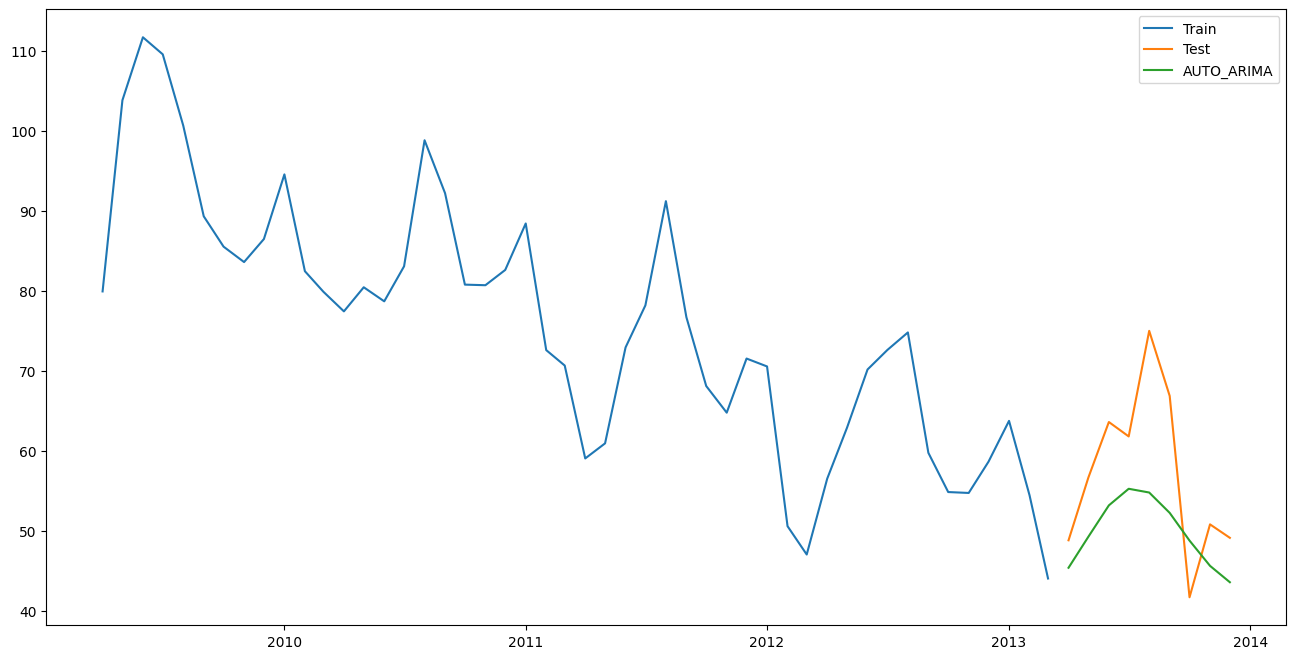

In [158]:
model_forecast['AUTO_ARIMA'] = test_pred
plt.figure(figsize=(16,8))
plt.plot( train['Price'], label='Train')
plt.plot(test['Price'], label='Test')
plt.plot(model_forecast['AUTO_ARIMA'], label='AUTO_ARIMA')
plt.legend(loc='best')
plt.show()

In [159]:
error_metrics(train['Price'], train_pred,test['Price'], 
              test_pred)


*** Error metrics Train data ***
MAE Train: 43.55196157731368
MSE Train: 1974.3295450174992
RMSE Train: 44.43342823840514
MAPE Train: 0.5864458259241532
***
 Error metrics Test Data ***
MAE Train: 8.943865484115172
MSE Train: 105.45923085471841
RMSE Train: 10.269334489377508
MAPE Train: 0.14944390983702963
